In [1]:
#Imports
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
%matplotlib inline

#Format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


### Idea:
- Estimate ETR more accurately

In [2]:
#Read data
all_data = pd.read_csv("data/all_data.tsv",index_col=None,sep="\t")
all_data.head()

,iso2,year,tax_rate_mean,tax_rate2_mean,tfa_wages_mean,ifa_wages_mean,cash_wages_mean,loans_wages_mean,capital_wages_mean,interestPaid_wages_mean,...,cash_wages_wcount,loans_wages_wcount,capital_wages_wcount,interestPaid_wages_wcount,RDexpenses_wages_wcount,profit_rate_rev_wcount,profit_rate_emp_wcount,zero_profits,mult,cons
0,AD,2013,0.093817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,1
1,AD,2014,0.088203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,1
2,AD,2015,0.057307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,1
3,AD,2016,0.098012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0,1
4,AE,1998,0.023718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [4]:
all_data["iso2_c"] = all_data["iso2"] + "_" + all_data["mult"].astype(str)

In [75]:
def plot_heatmap(var="tax_rate_median",cons=0):
    d = all_data.loc[(all_data["cons"]==cons)&(all_data["year"]>=1995)&(all_data["tax_rate_count"]>=10)].dropna(thresh=4)

    hetm = pd.pivot_table(d,values=var,index="iso2_c",columns="year").reset_index()
    hetm["iso2"] = hetm["iso2_c"].str[:2]
    hetm["count"] = hetm.groupby("iso2")["iso2_c"].transform(len)
    hetm = hetm.loc[hetm["count"]==3]
    del hetm["count"]
    del hetm["iso2"]

    hetm = hetm.set_index("iso2_c").sort_index()

    plt.figure(figsize=(40,4))
    sns.heatmap(hetm.transpose(),cmap="coolwarm", cbar_kws = dict(use_gridspec=False,location="right"),vmin=0,vmax=0.4)
    plt.yticks(rotation=0)
    plt.xticks(range(len(hetm)),list(hetm.index))

    plt.title("{}: Consolidation: {}".format(var,cons),fontsize=18)
    plt.show()

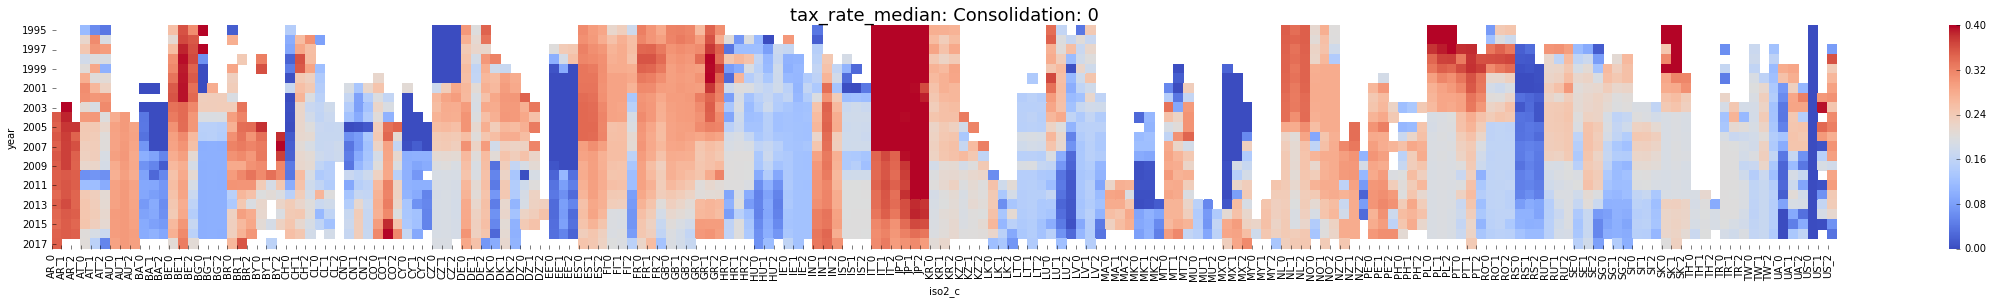

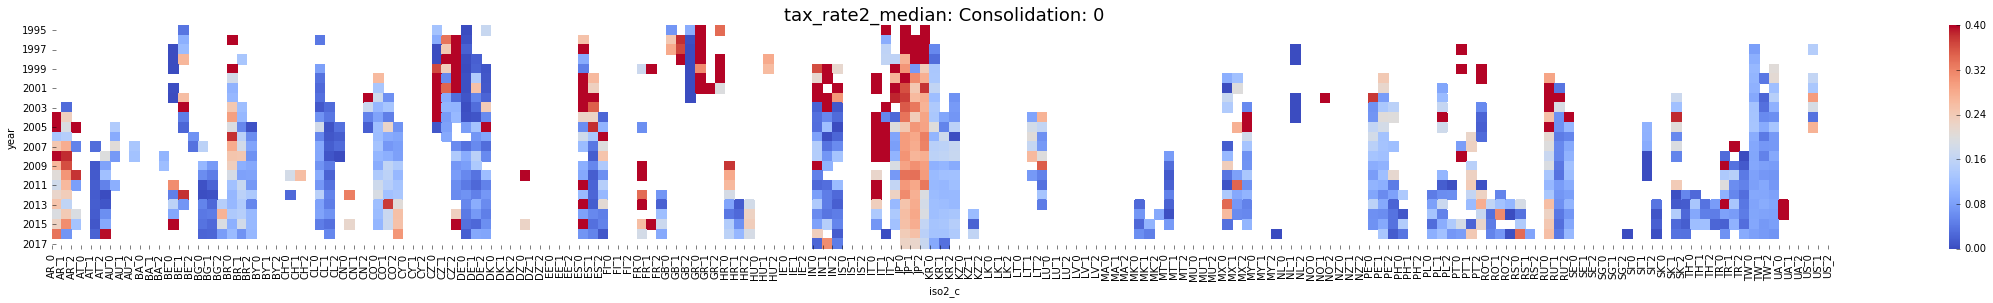

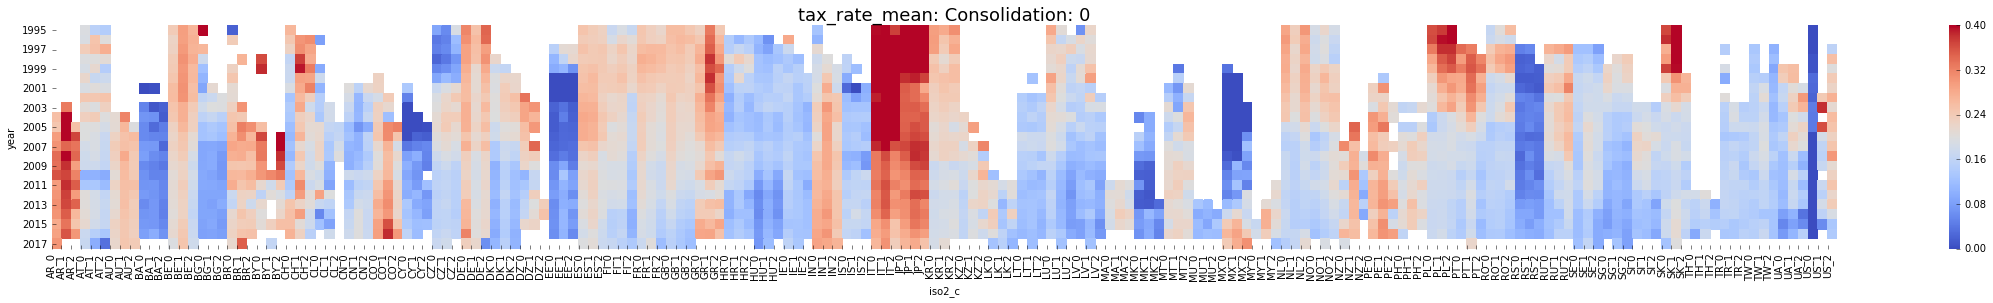

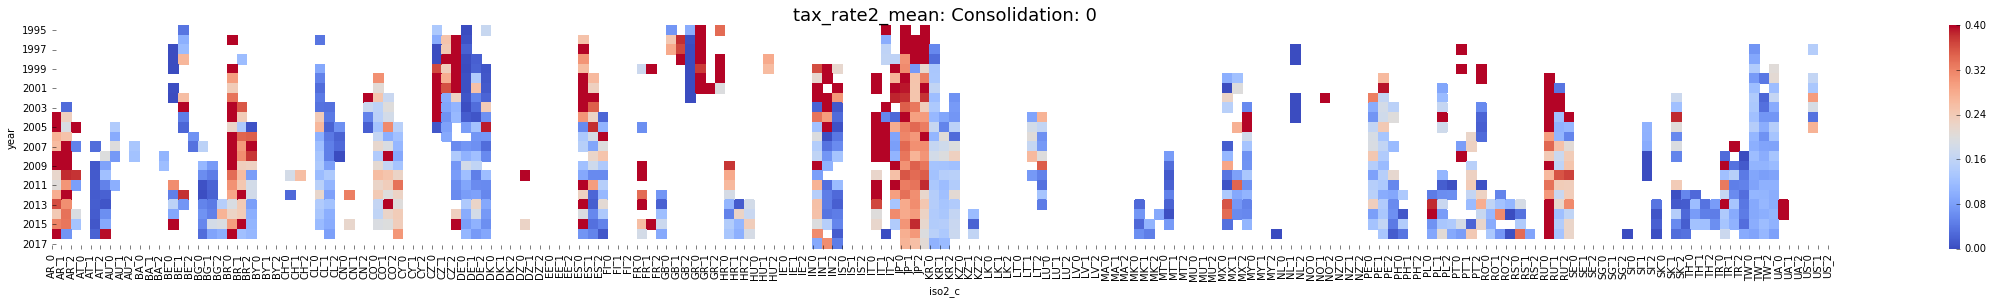

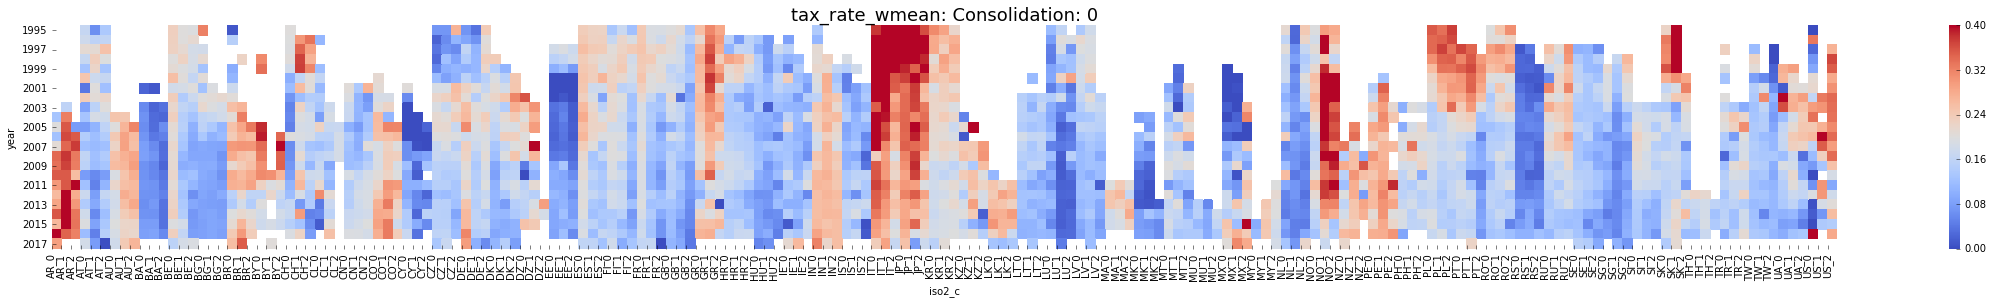

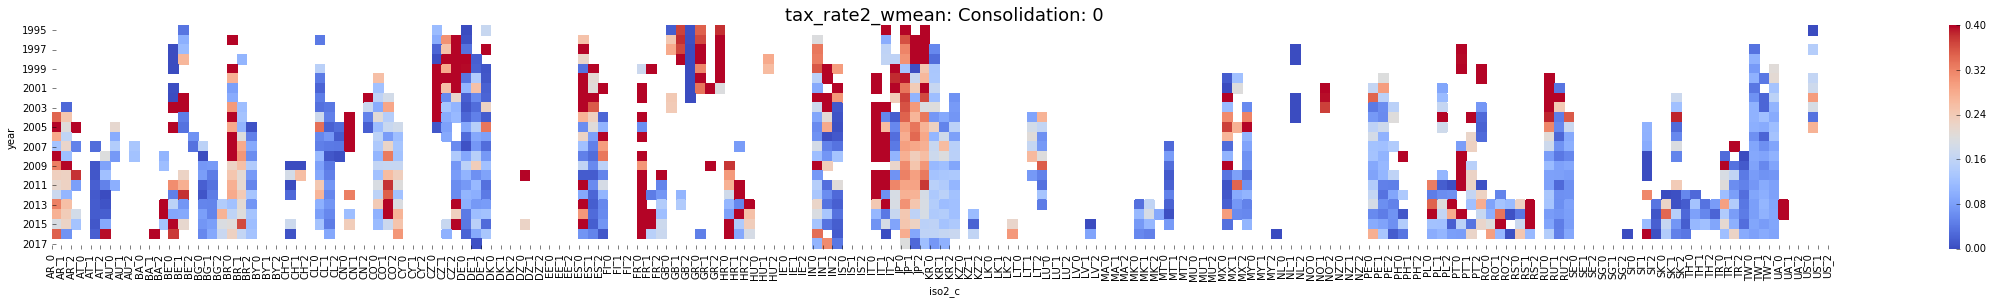

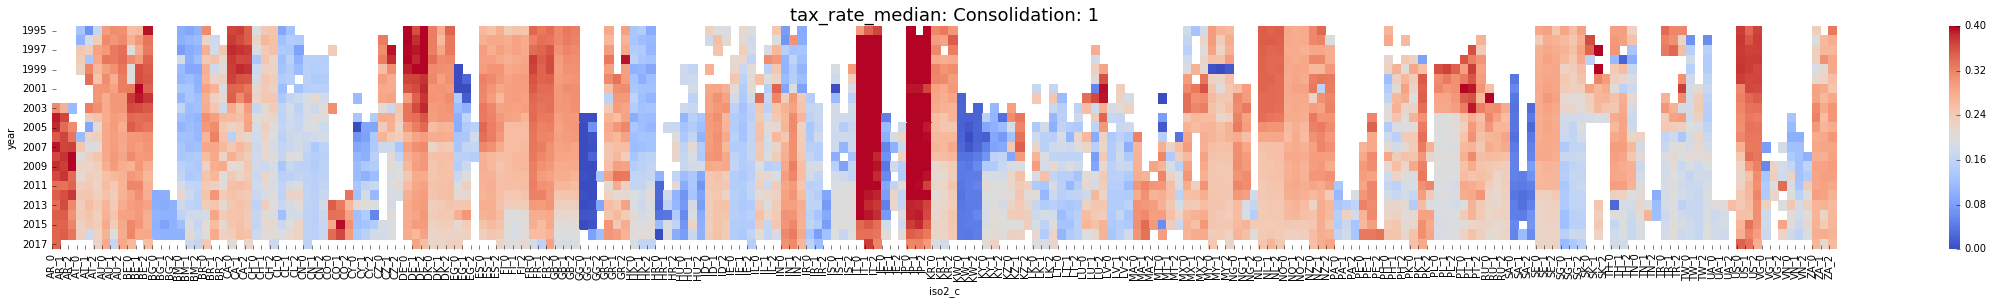

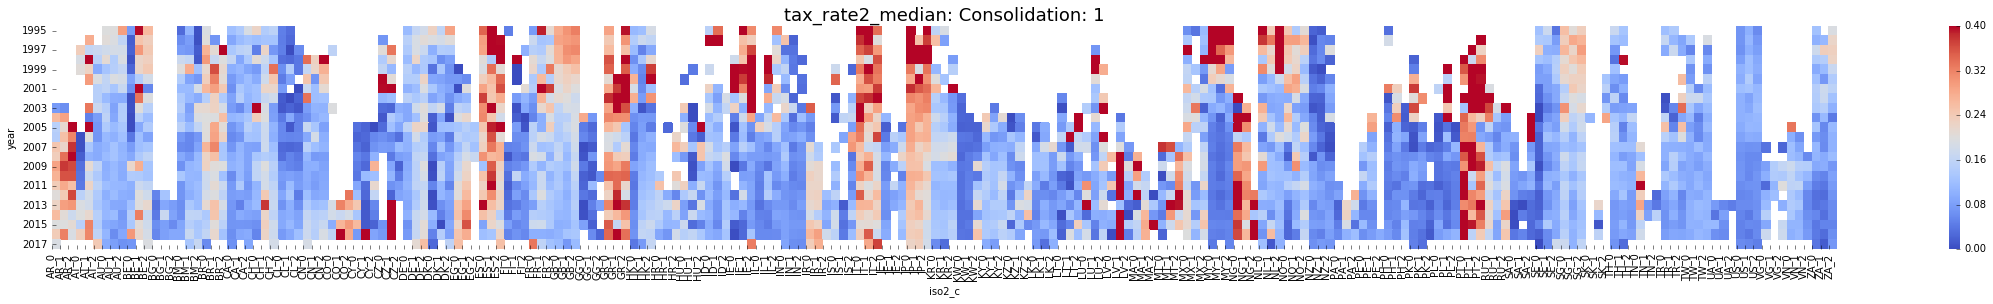

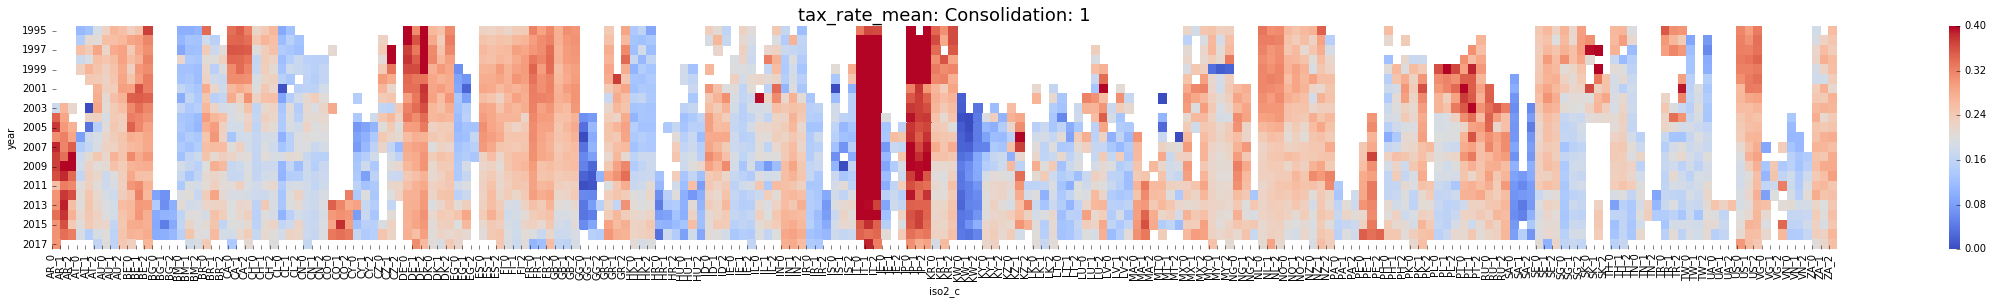

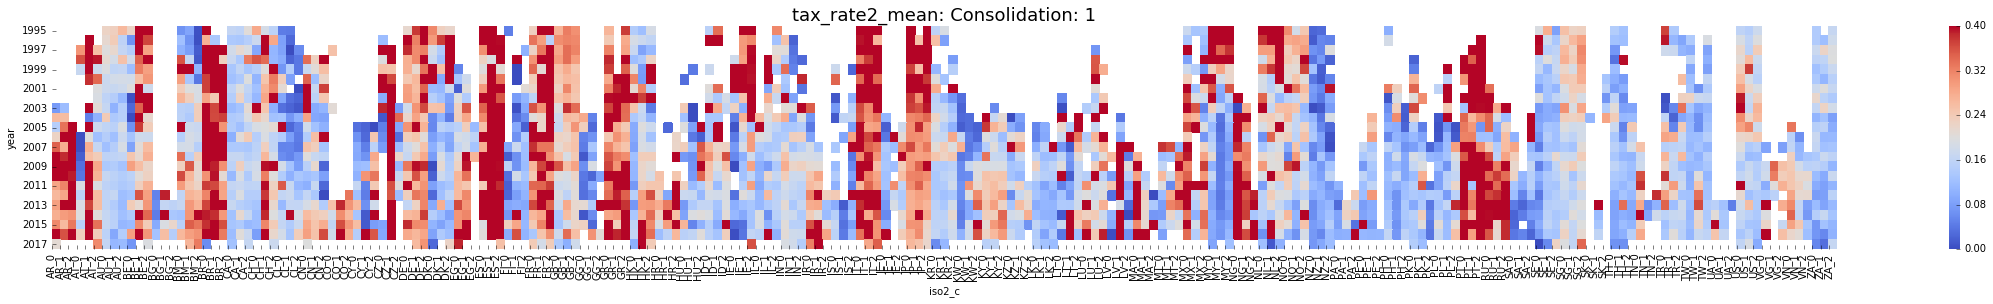

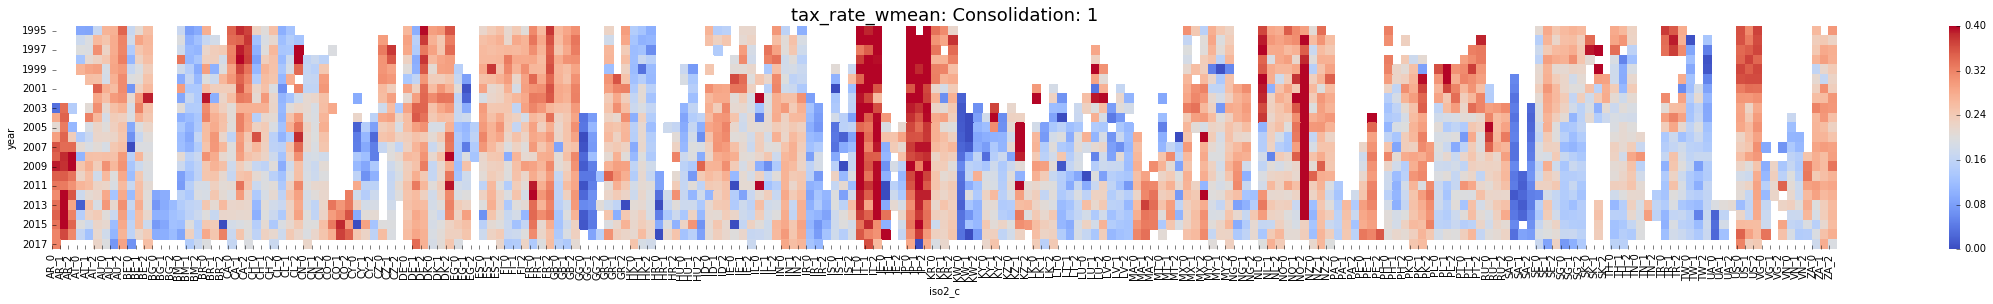

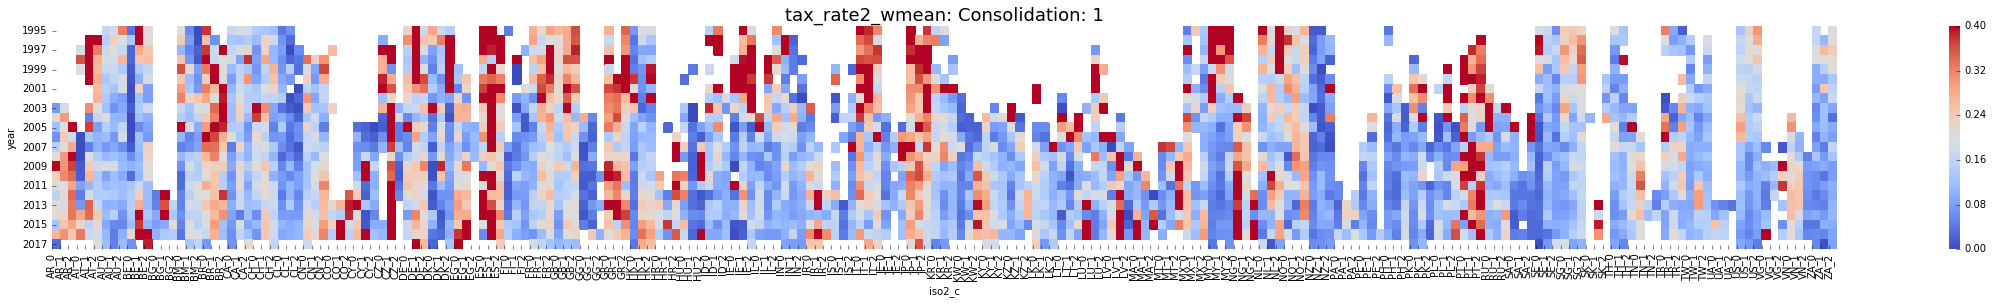

In [76]:
plot_heatmap("tax_rate_median")
plot_heatmap("tax_rate2_median")

plot_heatmap("tax_rate_mean")
plot_heatmap("tax_rate2_mean")

plot_heatmap("tax_rate_wmean")
plot_heatmap("tax_rate2_wmean")


plot_heatmap("tax_rate_median",cons=1)
plot_heatmap("tax_rate2_median",cons=1)

plot_heatmap("tax_rate_mean",cons=1)
plot_heatmap("tax_rate2_mean",cons=1)

plot_heatmap("tax_rate_wmean",cons=1)
plot_heatmap("tax_rate2_wmean",cons=1)